# Autoencoder

In [5]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))

# Add a dense layer with input the original image pixels and neurons the encoded representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Start with a sequential model
autoencoder = models.Model(inputs=input_img, outputs=decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the model with adadelta
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Load MNIST and preprocess
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data = (x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3949 - val_loss: 0.1887
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1793 - val_loss: 0.1538
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1498 - val_loss: 0.1336
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1314 - val_loss: 0.1210
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1205 - val_loss: 0.1124
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1123 - val_loss: 0.1063
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1065 - val_loss: 0.1022
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1024 - val_loss: 0.0990
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1000 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0978 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0966 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2

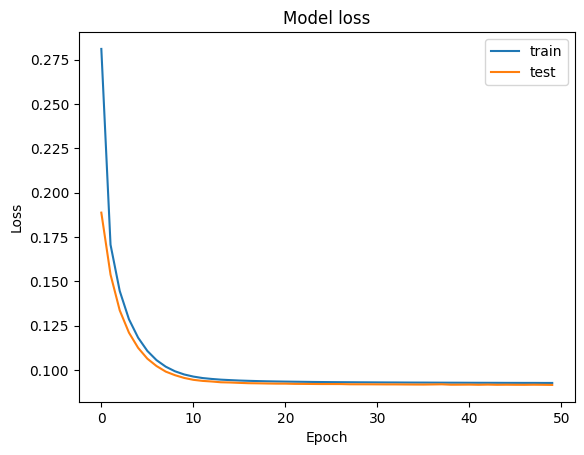

In [10]:
# Plot the loss
import matplotlib.pyplot as plt
history = autoencoder.history.history
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
# Encode the noisy images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 784)
(10000, 32)


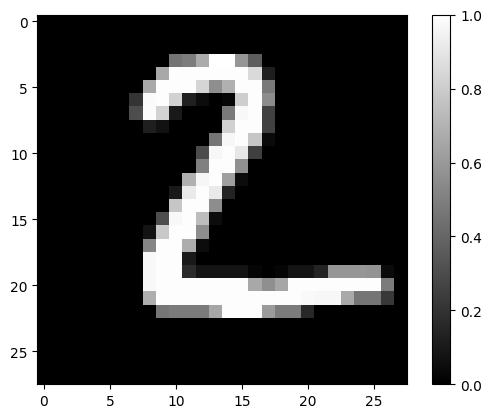

In [12]:
print(x_test.shape)
print(encoded_imgs.shape)

# Display a digit
def display_image(row):
    image = row.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

display_image(x_test[1])

In [ ]:
# # Plot the first 10 decoded images
# plt.figure(figsize=(20, 4))
# for i in range(10):
#     # Display original
#     ax = plt.subplot(2, 10, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
#     plt.title("Original")
#     plt.axis('off')

#     # Display encoded
#     ax = plt.subplot(2, 10, i + 11)
#     plt.imshow(encoded_imgs[i].reshape(8, 8), cmap='gray')
#     plt.title("Encoded")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

In [ ]:
# Pick your favorite number, say 7
# favorite_digit = 7
# indices = np.where(y_test == favorite_digit)[0]

# from matplotlib import pyplot as plt
# # Display the encoded representations for a few examples
# plt.figure(figsize=(10, 4))
# for i, idx in enumerate(indices[:10]):  # Show first 10 examples
#     ax = plt.subplot(2, 5, i+1)
#     plt.imshow(encoded_imgs[idx].reshape(8, 8), cmap='viridis')  # 64 = 8x8
#     plt.title(f'Encoded {favorite_digit}')
#     plt.axis('off')
# plt.show()

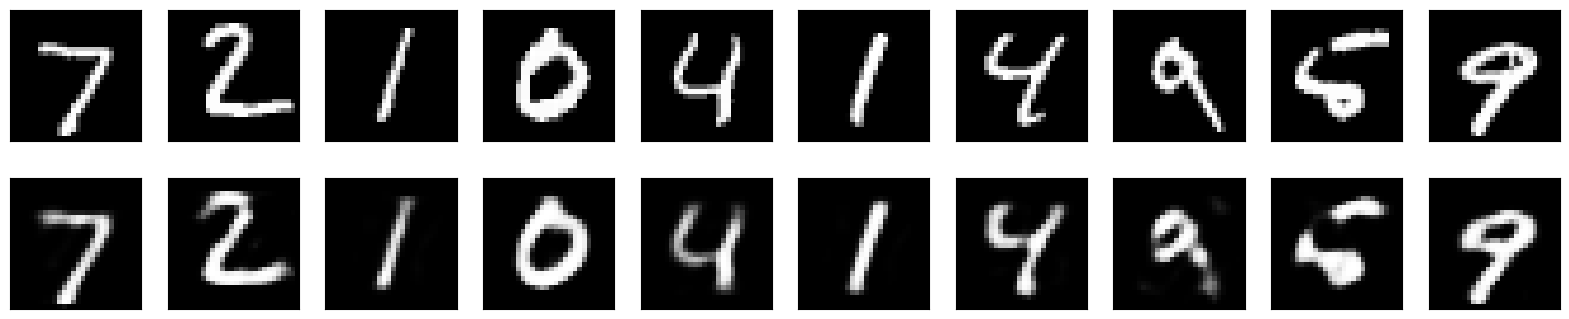

In [13]:
# Visualizing the digits
n = 10 # How many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()